In [2]:
# data analysis stack
import numpy as np
import pandas as pd

In [5]:
# Load the data
full_tit = pd.read_csv("../data/train.csv", index_col = 0)

In [6]:
full_tit.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# full_tit.sample(10)

In [10]:
# data types
full_tit.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [11]:
full_tit["Survived"].astype(str)

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: object

In [12]:
full_tit["Pclass"].astype(str)

PassengerId
1      3
2      1
3      3
4      1
5      3
      ..
887    2
888    1
889    3
890    1
891    3
Name: Pclass, Length: 891, dtype: object

In [15]:
X = full_tit.drop('Survived', axis=1)

y = full_tit['Survived']


In [16]:
# Import train-test-split
from sklearn.model_selection import train_test_split

In [17]:
# The function train_test_split() randomly separate the data. 
# If you want controll the randomness you set the random_state 
# to a value
Xtrain, Xtest, ytrain, ytest = \
train_test_split(X, y, test_size=0.2,random_state=42)

In [18]:
# Always check the shape of your train and test arrays to check if this was done correctly
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((712, 10), (179, 10), (712,), (179,))

In [19]:
ytrain.value_counts(normalize=True)

0    0.623596
1    0.376404
Name: Survived, dtype: float64

In [21]:
from sklearn.dummy import DummyClassifier

In [22]:
# The Dummy Classifier takes a look at all your labels. 
# Counts which one is the most frequent. 
# Will use that label as the resulting prediction.
dummy_model = DummyClassifier(strategy='most_frequent')

In [23]:
# model training
dummy_model.fit(Xtrain,ytrain)

DummyClassifier(strategy='most_frequent')

In [24]:
# score on your training data
round(dummy_model.score(Xtrain, ytrain),3)

0.624

In [27]:
# score on your test data
round(dummy_model.score(Xtest, ytest),3)

0.587

In [26]:
pd.Series(ytest).value_counts(normalize=True).round(3)

0    0.587
1    0.413
Name: Survived, dtype: float64

In [36]:
df_train = Xtrain
df_train["Survived"] = ytrain
df_train.head()
df_train.shape

(712, 11)

<Axes: >

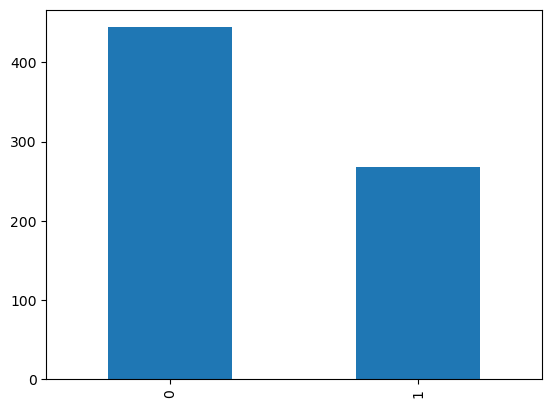

In [34]:
# Calculate the number of surviving/non-surviving passengers and display it as a bar plot.
df_train["Survived"].value_counts().plot.bar()

In [48]:
# Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.
all_first = (df_train['Pclass'] == 1).sum()
sur_first = ((df_train['Survived'] == 1) & (df_train['Pclass'] == 1)).sum()
sur_first/all_first

0.6073619631901841

<Axes: xlabel='Pclass', ylabel='count'>

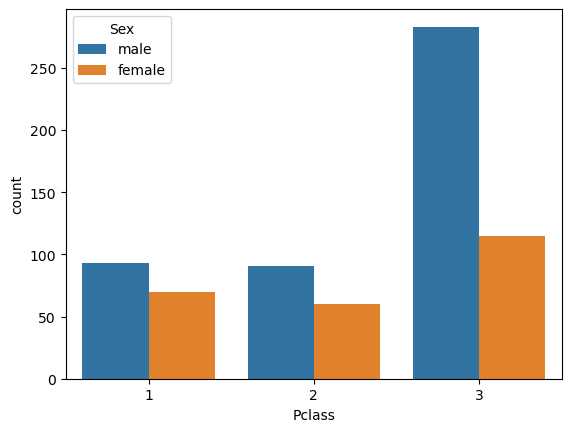

In [41]:
# Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.

import seaborn as sns
sns.countplot(x ='Pclass', hue = "Sex", data = df_train)


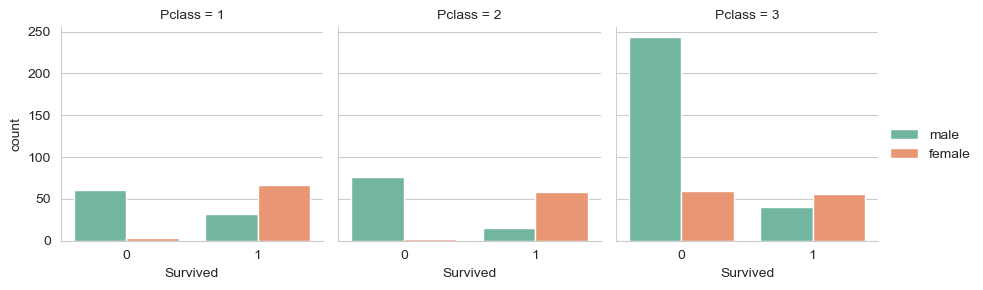

In [58]:
sns.set_style("whitegrid")

p = sns.FacetGrid(df_train, col="Pclass")
p.map_dataframe(sns.countplot, x="Survived", hue="Sex", palette="Set2")
p.add_legend()